### *Importing Libraries and loading Data*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
smokers_df = pd.read_csv("./smokers.csv")

In [3]:
smokers_df.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
0,1974,Unweighted,NaN,46,44,51,52,50,33
1,1976,Unweighted,NaN,42,42,45,48,48,30
2,1978,Unweighted,NaN,40,39,45,45,45,30
3,1980,Unweighted,NaN,39,37,46,44,45,29
4,1982,Unweighted,NaN,35,35,38,39,41,27


In [4]:
smokers_df.shape

(84, 9)

In [5]:
smokers_df.columns

Index(['Year', 'Method', 'Sex', '16 and Over', '16-24', '25-34', '35-49',
       '50-59', '60 and Over'],
      dtype='object')

In [6]:
# Information about dataset
smokers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         84 non-null     int64 
 1   Method       84 non-null     object
 2   Sex          56 non-null     object
 3   16 and Over  84 non-null     int64 
 4   16-24        84 non-null     int64 
 5   25-34        84 non-null     int64 
 6   35-49        84 non-null     int64 
 7   50-59        84 non-null     int64 
 8   60 and Over  84 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 6.0+ KB


### *Exploratory of Data Analysis*

In [7]:
# Summary Statistics of Numerical Columns
smokers_df.describe()

,Year,16 and Over,16-24,25-34,35-49,50-59,60 and Over
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1997.250000,27.892857,31.345238,33.678571,31.285714,28.952381,18.750000
std,12.142601,7.525087,5.954636,7.287819,8.161873,9.376855,7.441134
min,1974.000000,17.000000,20.000000,20.000000,20.000000,18.000000,10.000000
25%,1987.500000,22.000000,26.000000,28.000000,25.000000,22.000000,13.000000
50%,2000.500000,27.000000,33.000000,34.000000,29.500000,26.000000,16.000000
75%,2007.250000,32.000000,35.000000,37.000000,36.000000,34.250000,23.000000
max,2014.000000,51.000000,47.000000,55.000000,55.000000,53.000000,44.000000


In [8]:
# Summary Statistics of categorical Columns
smokers_df.describe(include='object')

,Method,Sex
count,84,56
unique,2,2
top,Weighted,Male
freq,45,28


### *Handling Missing Value*

In [9]:
# Check missing value
smokers_df.isnull().sum()

Year            0
Method          0
Sex            28
16 and Over     0
16-24           0
25-34           0
35-49           0
50-59           0
60 and Over     0
dtype: int64

In [10]:
smokers_df.isnull().mean()

Year           0.000000
Method         0.000000
Sex            0.333333
16 and Over    0.000000
16-24          0.000000
25-34          0.000000
35-49          0.000000
50-59          0.000000
60 and Over    0.000000
dtype: float64

In [11]:
# Fill Null Value with Unknown
smokers_df['Sex']= smokers_df['Sex'].fillna("Unknown")

In [12]:
smokers_df['Sex']

0     Unknown
1     Unknown
2     Unknown
3     Unknown
4     Unknown
       ...   
79     Female
80     Female
81     Female
82     Female
83     Female
Name: Sex, Length: 84, dtype: object

In [13]:
# Check missing value
smokers_df.isnull().sum()

Year           0
Method         0
Sex            0
16 and Over    0
16-24          0
25-34          0
35-49          0
50-59          0
60 and Over    0
dtype: int64

In [14]:
smokers_df.isnull().mean()

Year           0.0
Method         0.0
Sex            0.0
16 and Over    0.0
16-24          0.0
25-34          0.0
35-49          0.0
50-59          0.0
60 and Over    0.0
dtype: float64

### *Data Analysis and Visualizations*

In [15]:
smokers_df['Total'] =smokers_df['16 and Over']+smokers_df['16-24']+smokers_df['25-34']+smokers_df['35-49']+smokers_df['50-59']+smokers_df['60 and Over']

In [16]:
smokers_df.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,Unweighted,Unknown,46,44,51,52,50,33,276
1,1976,Unweighted,Unknown,42,42,45,48,48,30,255
2,1978,Unweighted,Unknown,40,39,45,45,45,30,244
3,1980,Unweighted,Unknown,39,37,46,44,45,29,240
4,1982,Unweighted,Unknown,35,35,38,39,41,27,215


In [17]:
method_count = smokers_df['Method'].value_counts()
method_count

Method
Weighted      45
Unweighted    39
Name: count, dtype: int64

In [18]:
gender_count = smokers_df['Sex'].value_counts()
gender_count

Sex
Unknown    28
Male       28
Female     28
Name: count, dtype: int64

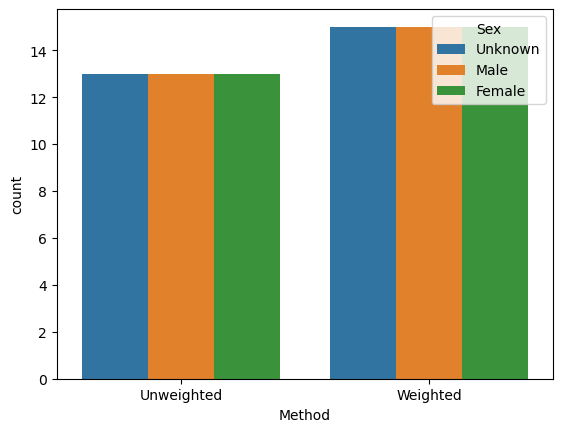

In [19]:
sns.countplot(x='Method', data=smokers_df, hue = 'Sex')
plt.show()

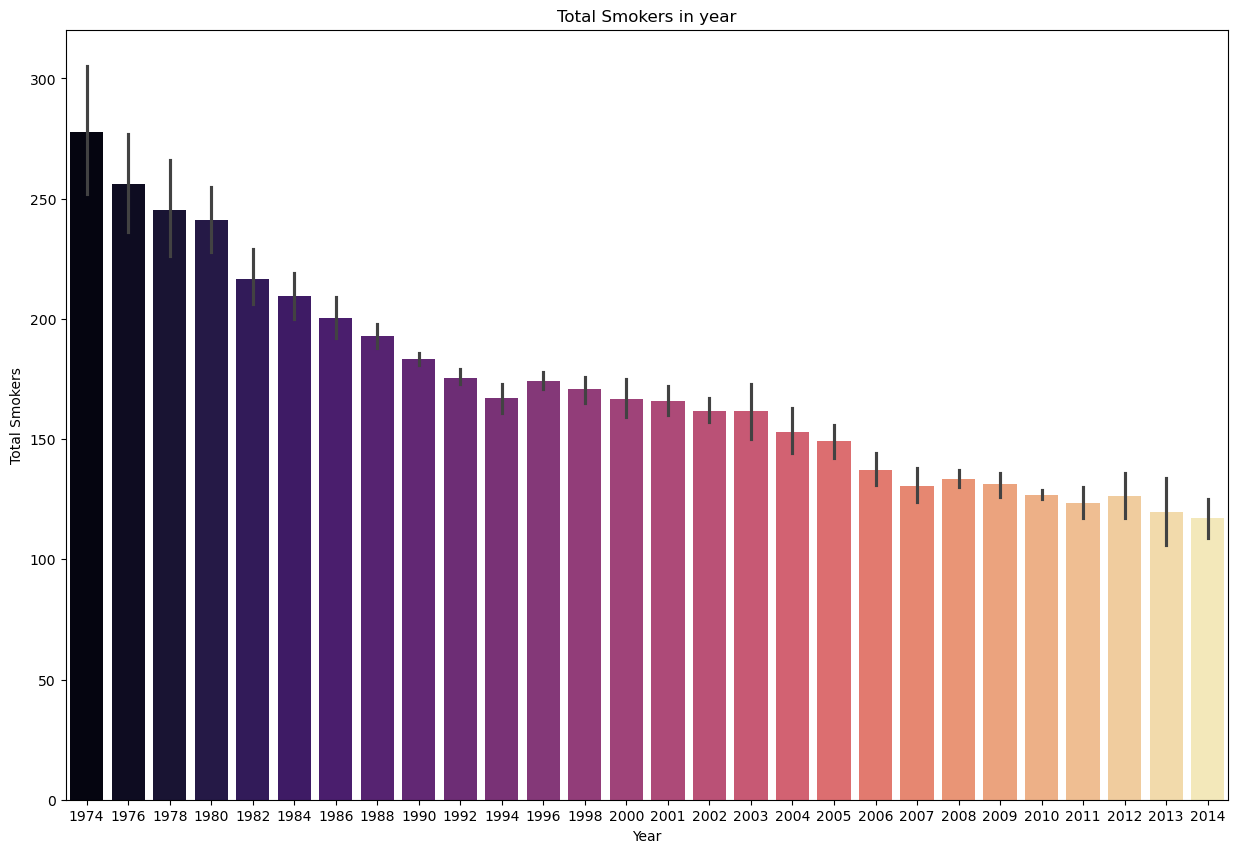

In [20]:
# How many total smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['Total'], palette='magma')
plt.title('Total Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

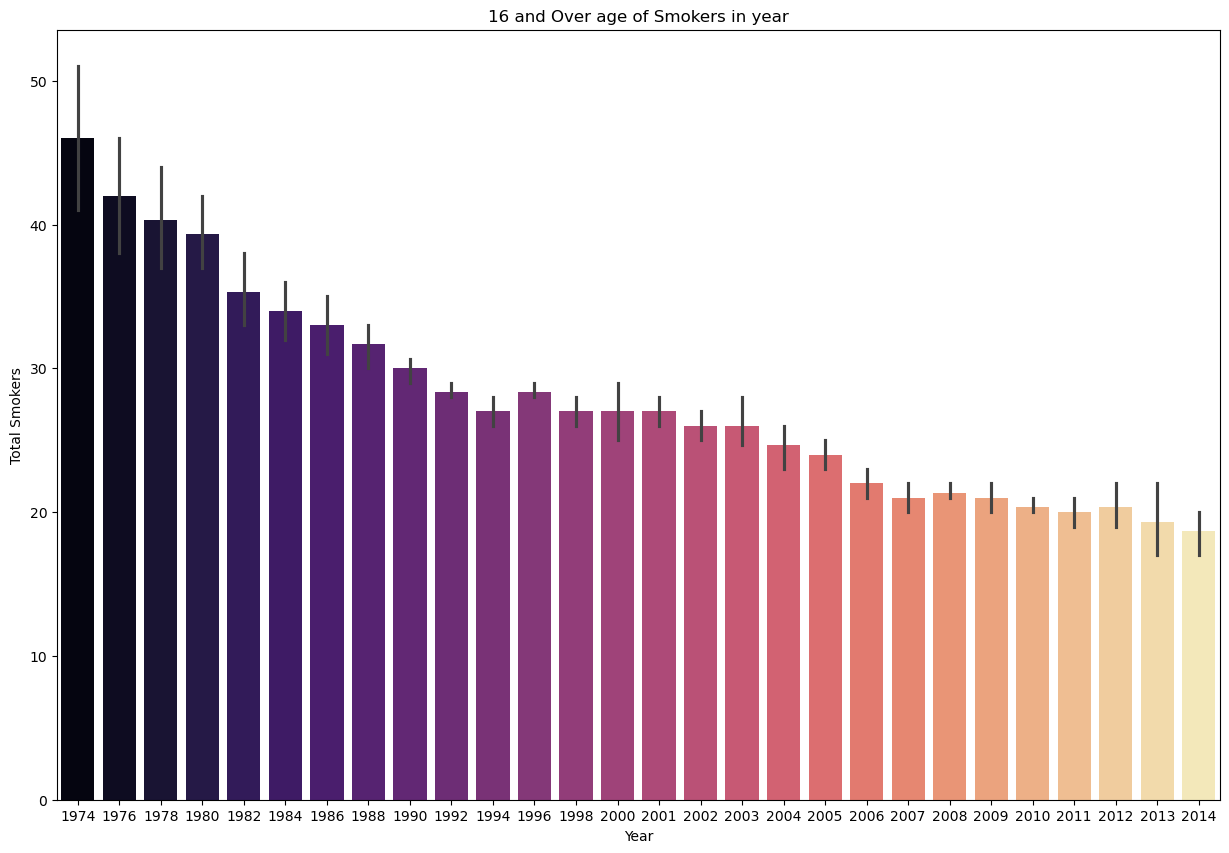

In [21]:
# How many '16 and Over' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['16 and Over'], palette='magma')
plt.title('16 and Over age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

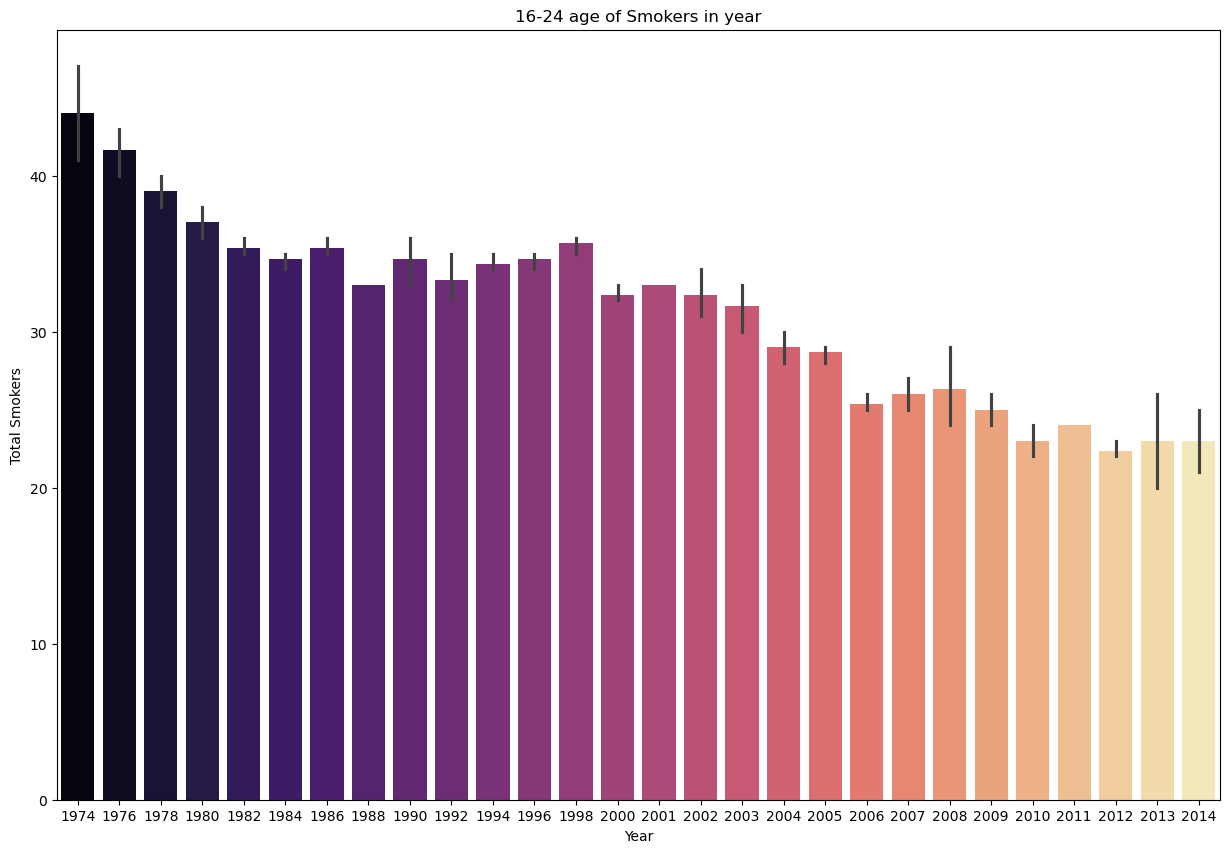

In [22]:
# How many '16-24' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['16-24'], palette='magma')
plt.title('16-24 age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

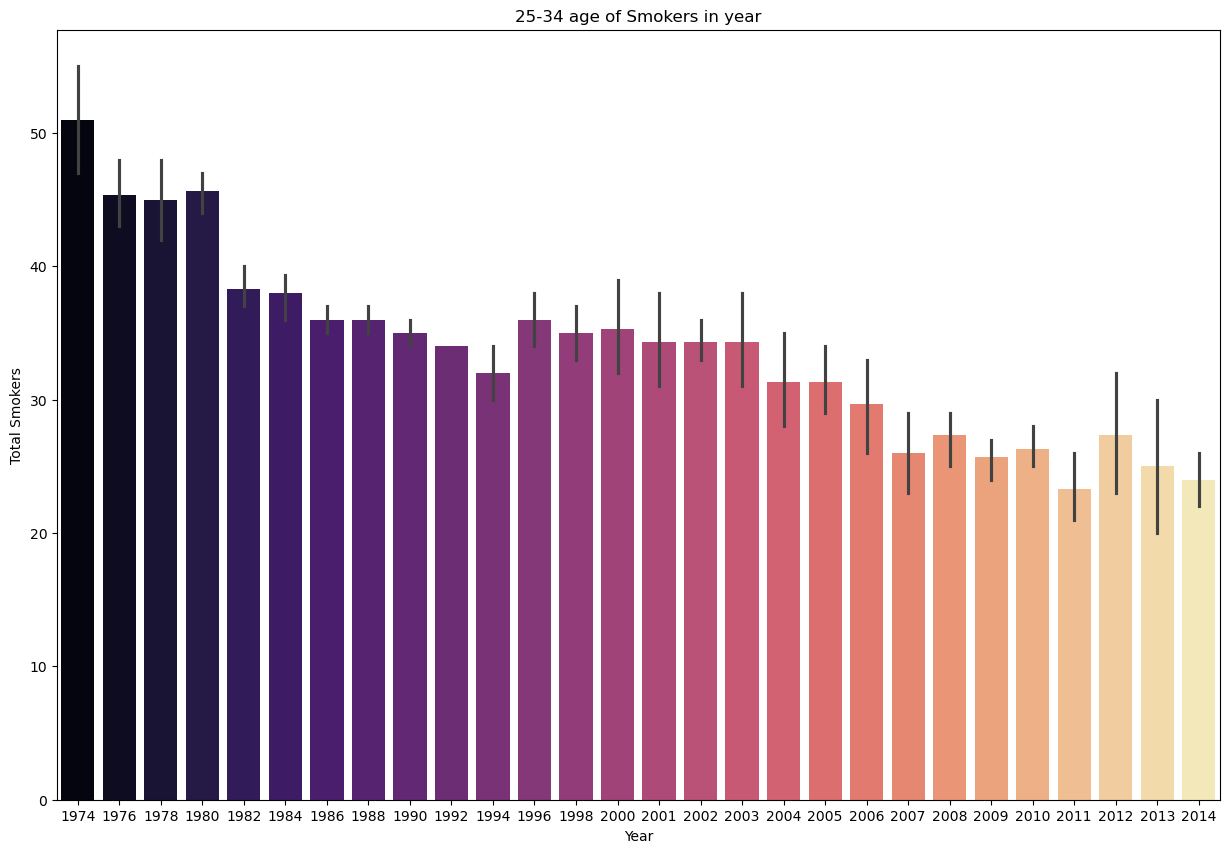

In [23]:
# How many '25-34' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['25-34'], palette='magma')
plt.title('25-34 age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

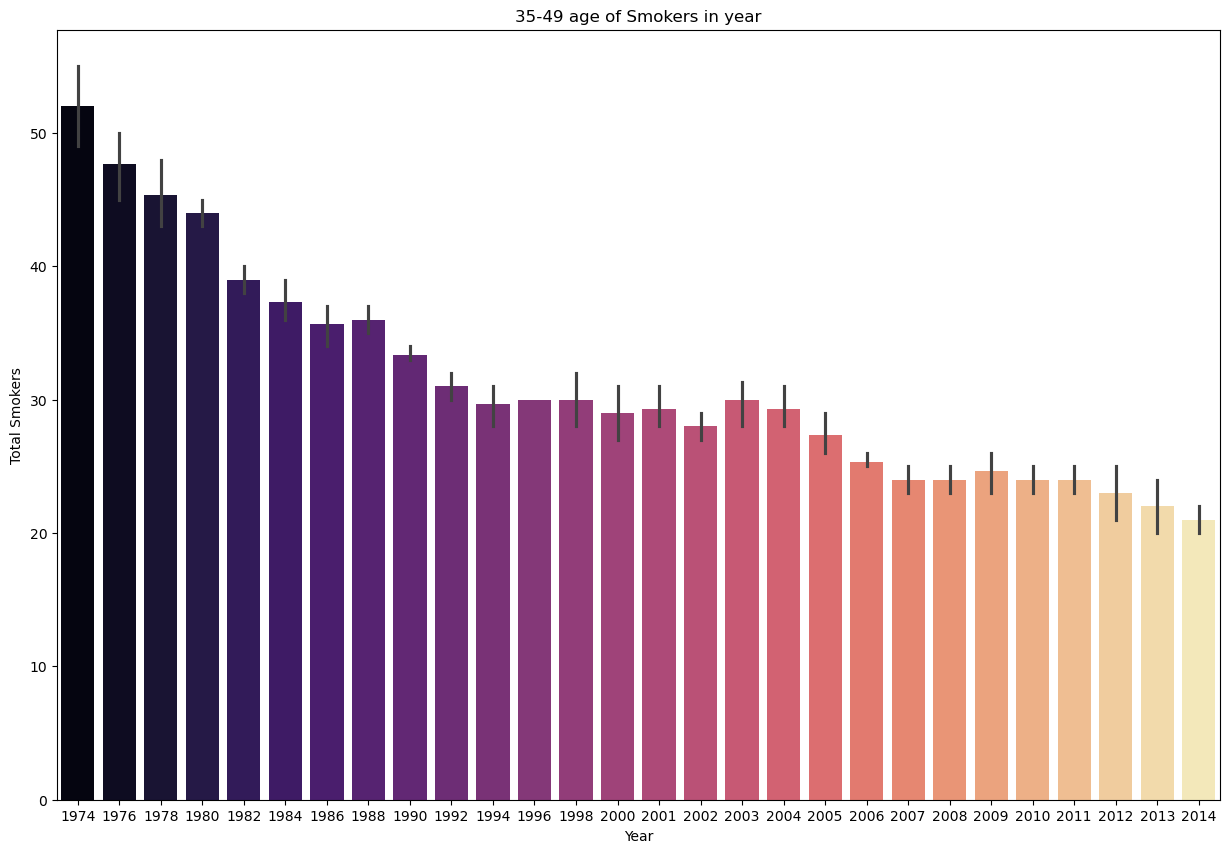

In [24]:
# How many '35-49' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['35-49'], palette='magma')
plt.title('35-49 age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

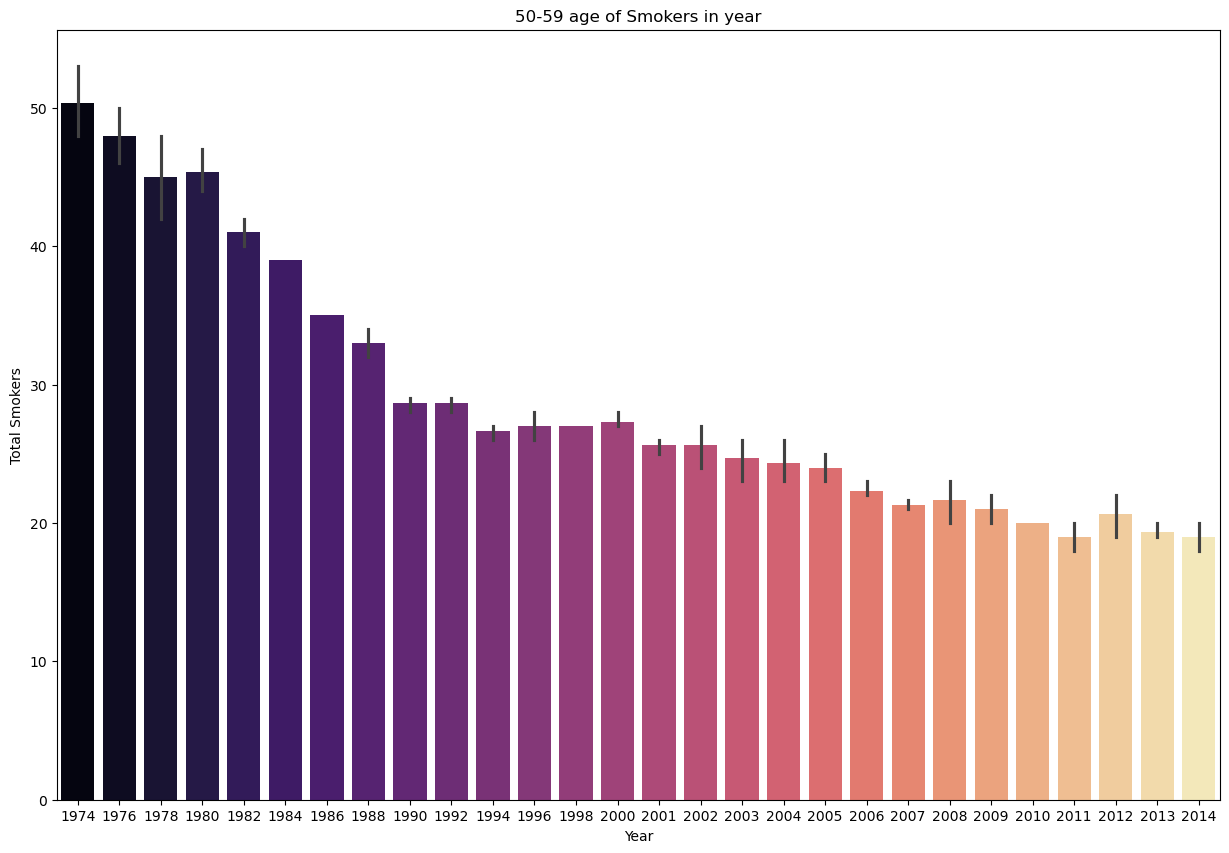

In [25]:
# How many '50-59' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['50-59'], palette='magma')
plt.title('50-59 age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

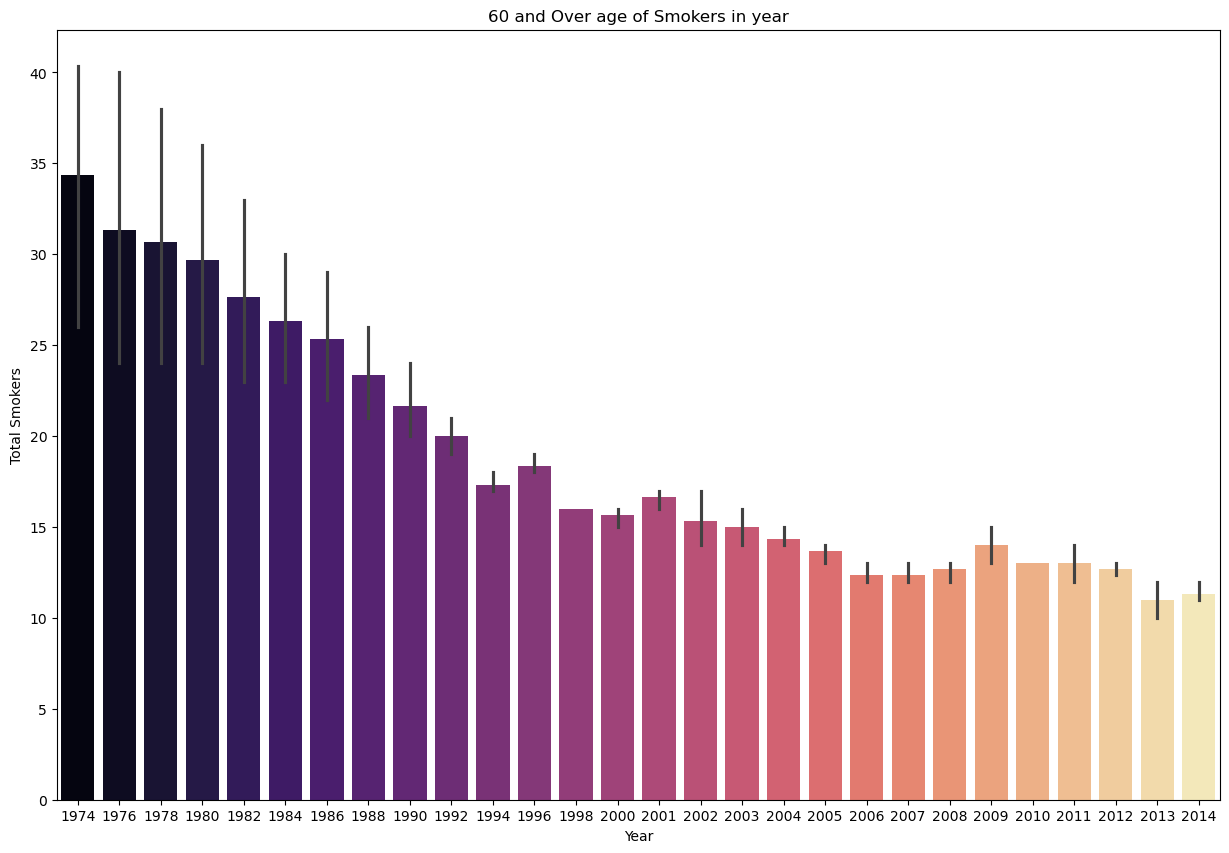

In [26]:
# How many '60 and Over' smokers in each year
plt.figure(figsize=(15,10))
sns.barplot(x = smokers_df['Year'], y = smokers_df['60 and Over'], palette='magma')
plt.title('60 and Over age of Smokers in year')
plt.xlabel('Year')
plt.ylabel('Total Smokers')
plt.show()

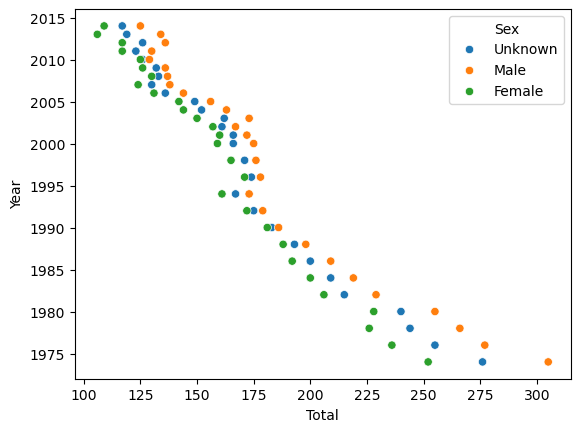

In [27]:
# How many total smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='Total', y= 'Year', hue = 'Sex')
plt.show()

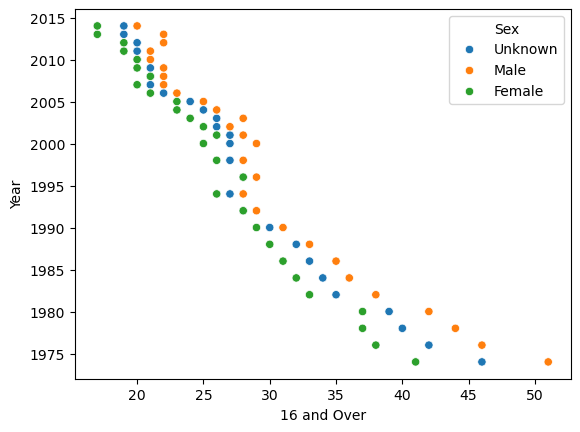

In [28]:
# How many '16 and Over' smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='16 and Over', y= 'Year', hue = 'Sex')
plt.show()

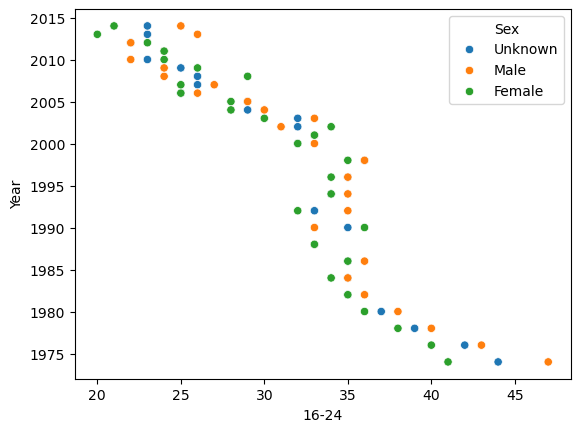

In [29]:
# How many '16-24' smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='16-24', y= 'Year', hue = 'Sex')
plt.show()

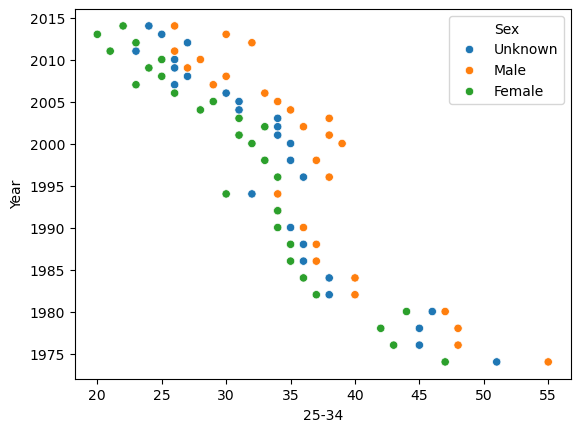

In [30]:
# How many '25-34' smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='25-34', y= 'Year', hue = 'Sex')
plt.show()

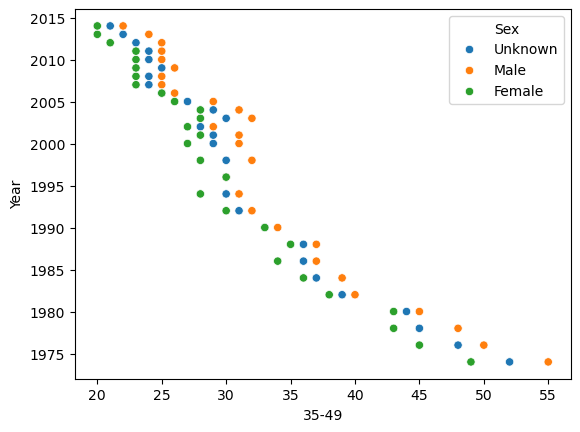

In [31]:
# How many '35-49' smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='35-49', y= 'Year', hue = 'Sex')
plt.show()

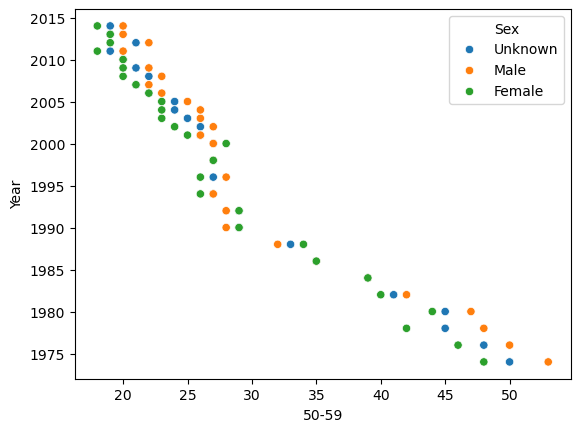

In [32]:
# How many '50-59' smokers in each year according to the Sex
sns.scatterplot(data=smokers_df, x='50-59', y= 'Year', hue = 'Sex')
plt.show()

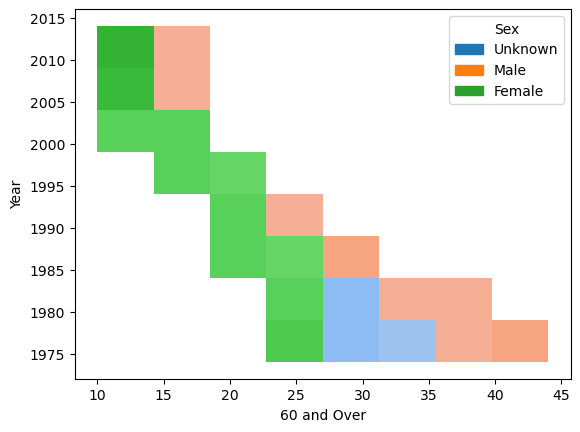

In [33]:
# How many '60 and Over' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='60 and Over', y= 'Year', hue = 'Sex')
plt.show()

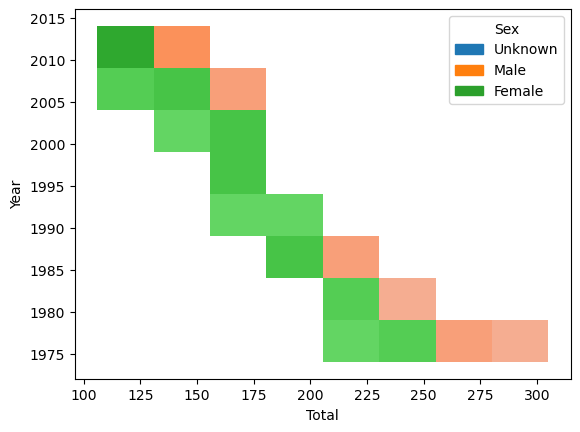

In [34]:
# How many total smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='Total', y= 'Year', hue = 'Sex')
plt.show()

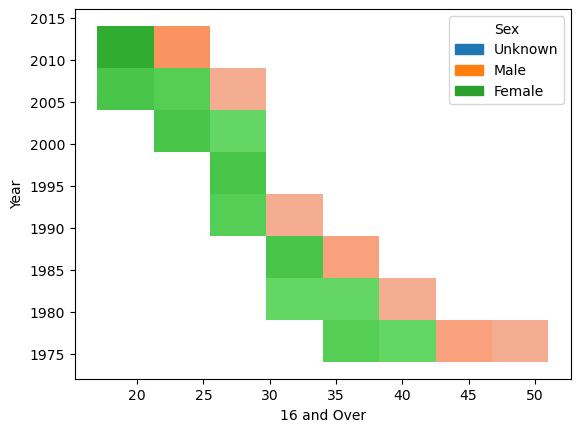

In [35]:
# How many '16 and Over' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='16 and Over', y= 'Year', hue = 'Sex')
plt.show()

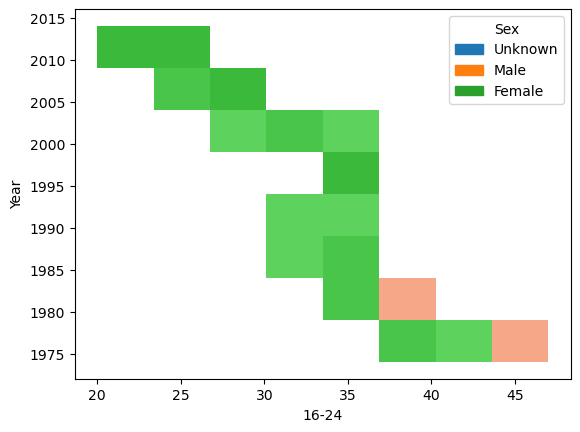

In [36]:
# How many '16-24' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='16-24', y= 'Year', hue = 'Sex')
plt.show()

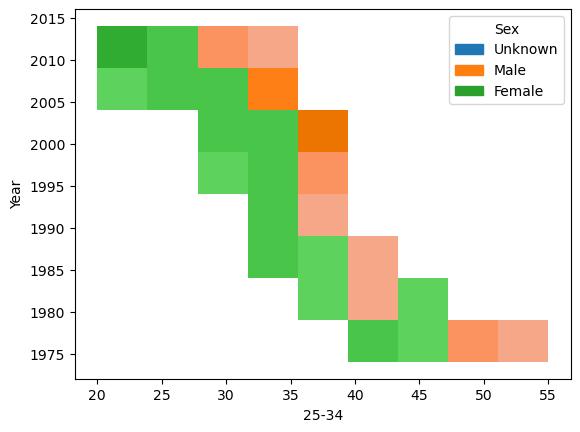

In [37]:
# How many '25-34' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='25-34', y= 'Year', hue = 'Sex')
plt.show()

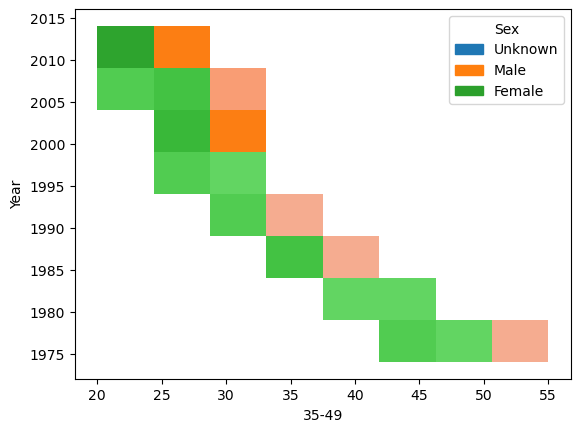

In [38]:
# How many '35-49' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='35-49', y= 'Year', hue = 'Sex')
plt.show()

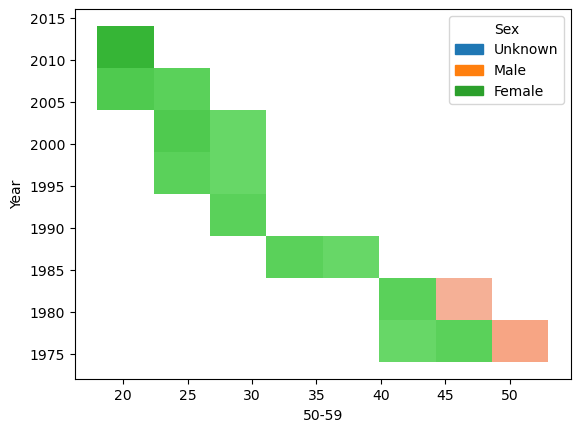

In [39]:
# How many '50-59' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='50-59', y= 'Year', hue = 'Sex')
plt.show()

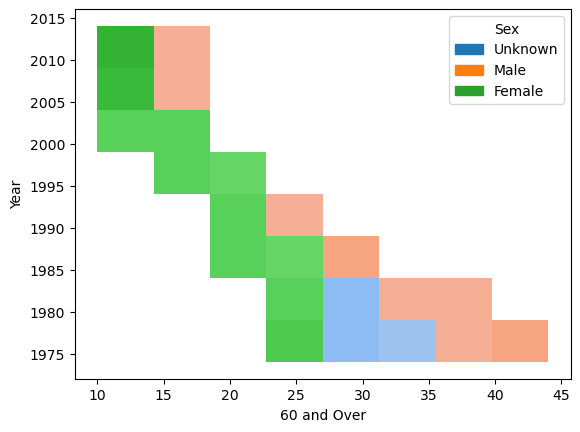

In [40]:
# How many '60 and Over' smokers in each year according to the Sex
sns.histplot(data=smokers_df, x='60 and Over', y= 'Year', hue = 'Sex')
plt.show()

### *Data Preparation*

In [41]:
smokers_df.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,Unweighted,Unknown,46,44,51,52,50,33,276
1,1976,Unweighted,Unknown,42,42,45,48,48,30,255
2,1978,Unweighted,Unknown,40,39,45,45,45,30,244
3,1980,Unweighted,Unknown,39,37,46,44,45,29,240
4,1982,Unweighted,Unknown,35,35,38,39,41,27,215


In [42]:
# Convert Sex Column as Numeric like Male as 2, Female as 1 and Unknown as 0
smokers_df['Sex'] = smokers_df['Sex'].apply({'Male':2, 'Female':1,'Unknown':2}.get)

In [43]:
# Convert Method Column as Numeric like Weighted as 1 and Unweighted as 0
smokers_df['Method'] = smokers_df['Method'].apply({'Weighted':1, 'Unweighted':0}.get)

In [44]:
smokers_df.head()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,0,2,46,44,51,52,50,33,276
1,1976,0,2,42,42,45,48,48,30,255
2,1978,0,2,40,39,45,45,45,30,244
3,1980,0,2,39,37,46,44,45,29,240
4,1982,0,2,35,35,38,39,41,27,215


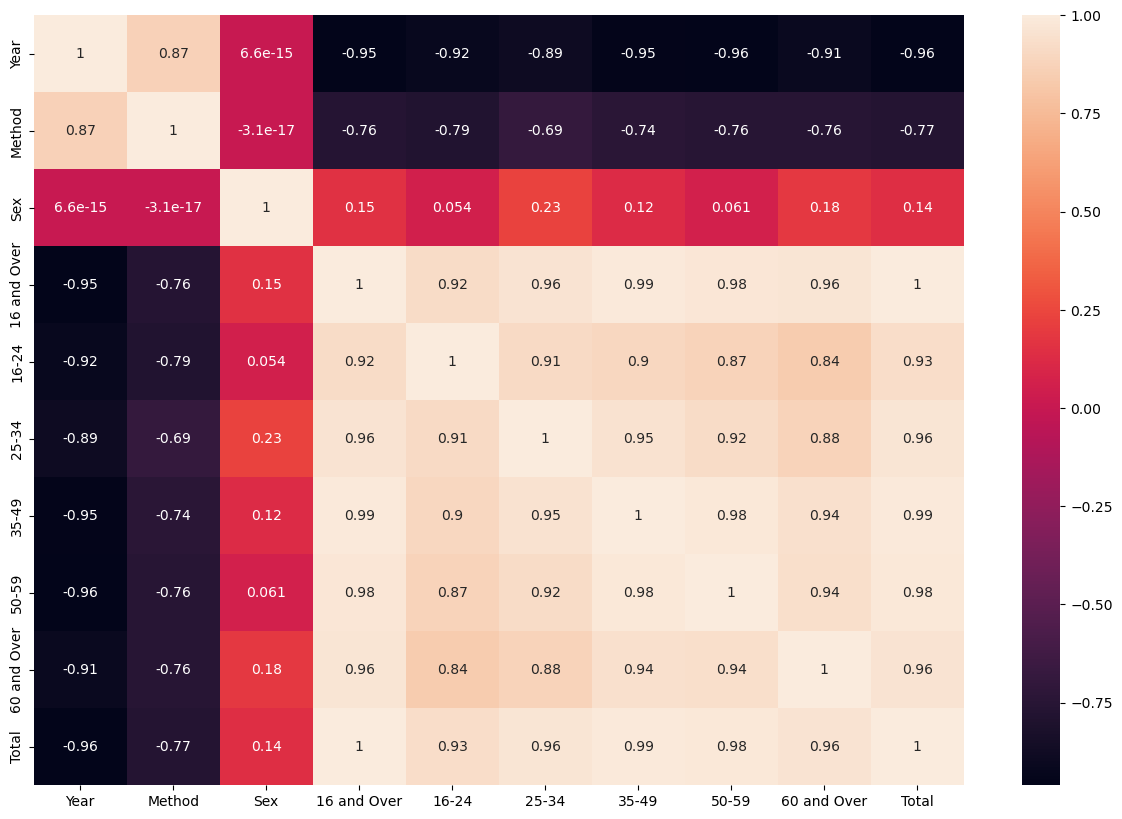

In [45]:
# Check Correlation between them
plt.figure(figsize=(15,10))
sns.heatmap(smokers_df.corr(), annot=True)
plt.show()

### *Feature Engineering*

In [46]:
X = smokers_df.drop(columns = ['Method'])
y = smokers_df['Method']

In [47]:
X

,Year,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Total
0,1974,2,46,44,51,52,50,33,276
1,1976,2,42,42,45,48,48,30,255
2,1978,2,40,39,45,45,45,30,244
3,1980,2,39,37,46,44,45,29,240
4,1982,2,35,35,38,39,41,27,215
...,...,...,...,...,...,...,...,...,...
79,2010,1,20,24,25,23,20,13,125
80,2011,1,19,24,21,23,18,12,117
81,2012,1,19,23,23,21,19,12,117
82,2013,1,17,20,20,20,19,10,106


In [48]:
y

0     0
1     0
2     0
3     0
4     0
     ..
79    1
80    1
81    1
82    1
83    1
Name: Method, Length: 84, dtype: int64

In [49]:
X.values

array([[1974,    2,   46,   44,   51,   52,   50,   33,  276],
       [1976,    2,   42,   42,   45,   48,   48,   30,  255],
       [1978,    2,   40,   39,   45,   45,   45,   30,  244],
       [1980,    2,   39,   37,   46,   44,   45,   29,  240],
       [1982,    2,   35,   35,   38,   39,   41,   27,  215],
       [1984,    2,   34,   35,   38,   37,   39,   26,  209],
       [1986,    2,   33,   35,   36,   36,   35,   25,  200],
       [1988,    2,   32,   33,   36,   36,   33,   23,  193],
       [1990,    2,   30,   35,   35,   33,   29,   21,  183],
       [1992,    2,   28,   33,   34,   31,   29,   20,  175],
       [1994,    2,   27,   34,   32,   30,   27,   17,  167],
       [1996,    2,   28,   35,   36,   30,   27,   18,  174],
       [1998,    2,   27,   36,   35,   30,   27,   16,  171],
       [2000,    2,   27,   32,   35,   29,   27,   16,  166],
       [2001,    2,   27,   33,   34,   29,   26,   17,  166],
       [2002,    2,   26,   32,   34,   28,   26,   15,

In [50]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [53]:
X_train.shape, X_test.shape

((58, 9), (26, 9))

In [54]:
X_train

array([[1984,    2,   34,   35,   38,   37,   39,   26,  209],
       [2004,    2,   26,   30,   35,   31,   26,   15,  163],
       [1980,    2,   42,   38,   47,   45,   47,   36,  255],
       [1986,    2,   35,   36,   37,   37,   35,   29,  209],
       [2003,    2,   28,   33,   38,   32,   26,   16,  173],
       [2014,    1,   17,   21,   22,   20,   18,   11,  109],
       [2003,    2,   26,   32,   34,   30,   25,   15,  162],
       [1990,    1,   29,   36,   34,   33,   29,   20,  181],
       [1988,    2,   32,   33,   36,   36,   33,   23,  193],
       [1996,    1,   28,   34,   34,   30,   26,   19,  171],
       [1974,    1,   41,   41,   47,   49,   48,   26,  252],
       [2006,    2,   22,   25,   30,   25,   22,   12,  136],
       [2000,    1,   25,   32,   32,   27,   28,   15,  159],
       [2012,    2,   20,   22,   27,   23,   21,   13,  126],
       [2012,    2,   22,   22,   32,   25,   22,   13,  136],
       [2000,    2,   27,   32,   35,   29,   27,   16,

In [55]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

### *Feature Scaling*

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### *Model Building*

In [57]:
model =  RandomForestClassifier()

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1], dtype=int64)

In [61]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

### *Model Evaluation*

In [62]:
model.score(X_train, y_train)

1.0

In [63]:
model.score(X_test, y_test)

0.8846153846153846

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.79      1.00      0.88        11

    accuracy                           0.88        26
   macro avg       0.89      0.90      0.88        26
weighted avg       0.91      0.88      0.89        26



In [65]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 0, 11]], dtype=int64)

In [66]:
accuracy_score(y_test, y_pred)

0.8846153846153846

In [67]:
roc_auc_score(y_test, y_pred)

0.9

### *Model Building and Evaluation for LogisticRegression()*

In [68]:
model =  LogisticRegression()

In [69]:
model.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1], dtype=int64)

In [72]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [73]:
model.score(X_train, y_train)

1.0

In [74]:
model.score(X_test, y_test)

0.7692307692307693

In [75]:
accuracy_score(y_test, y_pred)

0.7692307692307693

In [76]:
roc_auc_score(y_test, y_pred)

0.8

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.65      1.00      0.79        11

    accuracy                           0.77        26
   macro avg       0.82      0.80      0.77        26
weighted avg       0.85      0.77      0.77        26



In [78]:
confusion_matrix(y_test, y_pred)

array([[ 9,  6],
       [ 0, 11]], dtype=int64)